# COGS 108 - Final Project

# The Importance of Mental Health Benefits in the Tech Industry

 **By:** Gretta Musayelyan, Christabelle Pabalan, Victor Nazlukhanyan, & Rukmini Ravi

 ## Table Of Contents 
- Introduction and Background
- Research Question and Hypothesis
- Data Description
- 2014 Data Cleaning/Pre-processing
- 2018 Data Cleaning/Pre-processing
- Data Visualization
- Data Analysis & Results
- Privacy/Ethics Considerations
- Conclusions and Discussions
- Considerations and Limitations
- References

## Introduction and Background
The tech industry is infamous for being fast-paced, competitive, and stress-ridden. In the larger tech companies, employees are incentivized to work longer hours since companies make the "necessities" they may need (i.e. food, exercise equipment, rest areas) easily accessible so that there isn’t much of an urgency to leave. However, in startups, due to the shortage of employees, each individual contributes longer hours and has more responsibilities, all while having to balance all of this with their other jobs and schooling. It isn’t surprising that researchers from the University of California discovered that 72% of entrepreneurs reported having mental health concerns compared to 7% of the general population (Freeman et. al, 3). 

As a society, we have made huge advancements in reducing the stigma that has been present for a long time regarding mental health, but we are only now beginning to realize the repercussions of the high-stress environments that constitute the tech industry as a whole. For example, according to “Why We Need to Talk About Burnout In The Tech Industry,” user polls from the anonymous chat application "Blind" found that over half of tech employees reported that they were currently suffering from job burnout. Due to the societal stigma surrounding mental health, the high percentage of employee burnout, and the fast paced environment of the tech industry, we infer that there still isn’t enough conversation revolving around mental health. Additionally, tech industry employees are hardly left with any time for positive and meaningful self-reflection. We infer that there is a dire need for tech industry employers to have more conversations surrounding the idea of promoting mental health awareness and increasing mental health benefits (some of which are covered under health care laws, e.g., psychotherapy, counseling, and inpatient services) among and for their employees ("Mental"). The current state of affairs in the tech industry contributes to our hypothesis that if an employer were to provide mental health benefits, and raise awareness regarding these benefits, stigmas surrounding mental health would be minimized and the comfort levels of the employees to discuss these matters within their respective workplaces would increase. 

## Research Question & Hypothesis

### Research Question
How do mental health benefits and resources that employers provide correlate to the likelihood of the employees discussing mental health matters openly in the workplace?


### Hypothesis
When mental health benefits are provided and awareness is raised regarding these benefits by employers, employees are more likely to discuss mental health matters (e.g., to request medical leave when needed).

## Data Description
The OSMI Mental Health in Tech Survey is an annual survey administered to tech employees. The data is from Open Sourcing Mental Illness, a non-profit corporation dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities. The raw datasets are posted on the OSMI website, with a link to Kaggle available for download. The first dataset contains responses from 2014, and the second dataset contains responses from last year, 2018. OSMI and Kaggle do not mention how the data was sampled. While we do not know how the survey was conducted, most responses within the data come from more developed countries such as the United States, Canada, the United Kingdom, etc. This leaves out potentially significant data of mental stress that arises within developing countries.  
    

We will compare these two datasets in order to determine whether or not there have been any significant improvements in regard to raising awareness and offering mental health benefits, and how these have potentially contributed to changing the comfort levels of employees (for better) in regard to discussing mental health matters in the workplace.

**Source**
- 2014: https://www.kaggle.com/osmi/mental-health-in-tech-survey
- 2018: https://www.kaggle.com/osmihelp/osmi-mental-health-in-tech-survey-2018

In [ ]:
#import sys
#!{sys.executable} -m pip install wordcloud

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
import pandas_profiling as pdp
import patsy
import statsmodels.api as sm
#wordcloud
from wordcloud import WordCloud as wc

### Import Both Datasets

In [ ]:
df_2014 = pd.read_csv("2014_Data.csv")
df_2018 = pd.read_csv("2018_Data.csv")

In [ ]:
#Display entire DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 2014 Data

In [ ]:
df_2014.shape

(1259, 27)

In [ ]:
# display the first 5 rows of data set
df_2014.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Variables of Interest (2014)

##### INDEPENDENT VARIABLES

1. benefits: Does your employer provide mental health benefits?
2. anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
3. seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
4. wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
5. care_options: Do you know the options for mental health care your employer provides?


##### DEPENDENT VARIABLES
1. supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
2. coworkers: Would you be willing to discuss a mental health issue with your coworkers?
3. mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
4. phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
5. work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

##### BOTH
1. mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?
2. leave: How easy is it for you to take medical leave for a mental health condition?

In [ ]:
# Profile data and produce an HTML-based report 
pdp.ProfileReport(df_2014)

Number of variables,27
Number of observations,1259
Total Missing (%),5.6%
Total size in memory,265.6 KiB
Average record size in memory,216.1 B
Numeric,1
Categorical,26
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### Initial Observations from Pandas Profiling:

1. **Age** is *highly skewed*
    - The maximum is 99999999999 and the minimum is -1726
    -  **Solution**: Remove the outliers and omit any individual data that is not in an appropriate interval.
    
    
2. **Gender** needs to be cleaned
    - "Male" and "male" are in it's own distinct category. There are also 49 distinct values.
    - **Solution**: Clean the Gender data into M, F and Other.
    
    
3. **Self-Employed**: 
    - There are some rows that are labeled as self-employed. We are investigating whether or not an employer offering mental health benefits has an effect on the comfort the employees have in discussing mental health matters.
    - **Solution**: We will probably drop any row that is labeled as self-employed and transform the empty entries to "No." Afterwards, we could drop the self-employed column.
    
    
4. **Timestamp**
    - This isn't very relevant to our hypothesis.
    - **Solution**: We will probably drop timestamp as it doesn't play a role into what we are currently considering.
    
    
5. **Comments**: Most values are *missing*
    - This is to be expected, it seems to be a sort of "Additional Comments" section. 
    - **Solution**: However, there could potentially be great insights from doing a simple analysis on this.
    
    
6. **Country**: There are 48 distinct values 
    - US takes up more than half of the respondants. We, therefore, cannot generalize the findings to all tech companies. 
    - **Solution**: Perhaps we could use only the data from the US so that our findings will be representative of companies in the US.
    


### 2018 Data

In [ ]:
df_2018.head(5)

,#,<strong>Are you self-employed?</strong>,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",<strong>Do you have previous employers?</strong>,Was your employer primarily a tech company/organization?,<strong>Have your previous employers provided mental health benefits?</strong>,<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address yo

### Initial Observations 
These are the initial observations from skimming the entire 2018 dataframe. The data is not clean enough to gather distinct insights. These steps need to be accomplished prior to analyzing what else needs to be cleaned. 

1. **Drop:** First, we will simply drop all empty columns in the dataframe
1. **Strip:** We need to strip the columns of HTML tags (e.g. <strong)
2. **Rename:** The column names are extremely long in question form, and need to be renamed concisely.
3. **Delete:** There are 123 columns, we need to condense it down by deciding which ones to keep and which to delete.
5. **Repeating Columns:** There are multiple columns that repeat that need to be combined.
4. **Overlap:** We need to figure out which columns overlap and which ones we could compare from 2014 to 2018. We will place the overlapping data into another dataframe.

### VARIABLES OF INTEREST (2014)
(Note: The column names will be changed to corresponding variables below. We plan on matching the 2018 column names to corresponding 2014 column names for those that overlap.)

##### INDEPENDENT VARIABLES

1. benefits: Does your employer provide mental health benefits as part of healthcare coverage?
2. anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
3. seek_help: Does your employer offer resources to learn more about mental health disorders and options for seeking help?
4. wellness_program: Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
5. care_options: Do you know the options for mental health care available under your employer-provided health coverage?
6. family_history: do you have a family history of a mental illness?
7. gender: what is your gender?
8. medical_coverage: Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?
9. mental_disorder: do you have a mental disorder? 
10. resources: Do you know local or online resources to seek help for a mental health issue?
8. less_likely: Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?
9. observed_good_response: Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace? 
10. observed_bad_response: Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?
11. importance_physical_health: Overall, how much importance does your employer place on physical health?
12. importance_mental_health: Overall, how much importance does your employer place on mental health?
13. overall_tech: Overall, how well do you think the tech industry supports employees with mental health issues?

##### DEPENDENT VARIABLES
1. supervisor: Would you have been willing to discuss your mental health with your direct supervisor(s)?
2. coworkers: Would you feel comfortable discussing a mental health issue with your coworkers?
4. productivity: Do you believe your productivity is ever affected by a mental health issue?
5. sought_treatment: Have you ever sought treatment for a mental health disorder from a mental health professional? (are we asking through work or on their own?)
6. work_interference_symptoms: If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?
7. work_interference_treatment: If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively (i.e., when you are experiencing symptoms)?

##### BOTH
1. phys_mental_coworkers: Would you feel more comfortable talking to your coworkers about your physical health or your mental health?
2. leave: If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?
3. importance_mental_health: Overall, how much importance does your employer place on mental health?

## 2014 Data Cleaning / Pre-processing

### Clean Age by Removing Outliers
Age is highly skewed so we will remove the outliers and omit any individual data that is not in an appropriate interval.

In [ ]:
df_2014['Age'].describe() 

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

In [ ]:
df_2014['Age'].nunique() 

53

In [ ]:
# Create a method that changes the outliers to 'NaN'
# df["Cleaned Age"] = df["Cleaned Age"].astype(int)
def clean_age(Age):
    if Age>=16 and Age<=110:
        return Age
    else:
        return np.nan

In [ ]:
# Apply clean_age method to the Age column 
df_2014['Age'] = df_2014['Age'].apply(clean_age)

In [ ]:
df_2014['Age'].describe()

count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

In [ ]:
df_2014['Age'].unique()

array([37., 44., 32., 31., 33., 35., 39., 42., 23., 29., 36., 27., 46.,
       41., 34., 30., 40., 38., 50., 24., 18., 28., 26., 22., 19., 25.,
       45., 21., nan, 43., 56., 60., 54., 55., 48., 20., 57., 58., 47.,
       62., 51., 65., 49., 53., 61., 72.])

In [ ]:

# Check out the new column and make sure it looks right

print("'Age'")
print("Minimum value: ", df_2014["Age"].min())
print("Maximum value: ", df_2014["Age"].max())
average = df_2014["Age"].sum()/(df_2014["Age"].count()-8) 
print("Average value", round(average, 1))
print("How many values are NaN?: ", pd.isnull(df_2014['Age']).sum())

'Age'
Minimum value:  18.0
Maximum value:  72.0
Average value 32.3
How many values are NaN?:  8


C:\Users\Kangaroo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Frequency')

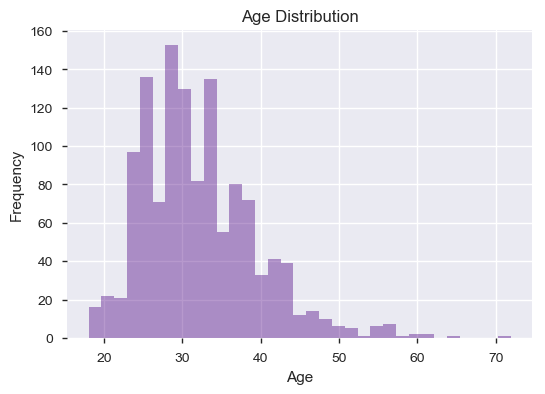

In [ ]:
fig,ax = plt.subplots(figsize=(6,4))
sns.distplot(df_2014['Age'].dropna(),ax=ax,kde=False, color = 'indigo')
plt.title('Age Distribution')
plt.ylabel('Frequency')

### Clean Gender by Standardizing the Values
There are 49 distinct values for gender. We will organize these into 'M', 'F' and 'Other'.

In [ ]:
df_2014['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [ ]:
def clean_gender(Gender):
    
    Gender = Gender.lower()
    Gender = Gender.strip()
    
    if Gender in ['Male', 'male','M','m', 'maile', 'make', 'msle', 'mail','malr','man','mal',
                 'Cis Male','Male (CIS)', 'cis male', 'Cis Man','Mal','Make','Man','Mail','Malr']:
        return 'M'
    if Gender in ['Female','female', 'F','f','femaile','femake','woman','femail','*shrug emoji* (F)',
                 'Cis Female','Female (cis)','Cisgendered woman','Cis woman', 'Female (cisgender)', 'Cis-Female',
                 'cisgender female', 'I identify as female','Woman','cis-female/femme']:
        return 'F'
    else:
        return 'Other'


In [ ]:
df_2014['Gender'] = df_2014['Gender'].apply(clean_gender)

In [ ]:
df_2014['Gender'].value_counts()

M        988
F        245
Other     26
Name: Gender, dtype: int64

### Remove Self-Employed Rows
Since we want to understand the relationship between an employer offering benefits and the comfort of an employee discussing mental health matters, we will drop the rows where the participant states they are self-employed.

In [ ]:
df_2014['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [ ]:
df_2014 = df_2014[df_2014.self_employed != 'Yes']

In [ ]:
df_2014['self_employed'].value_counts()

No    1095
Name: self_employed, dtype: int64

In [ ]:
df_2014.drop('self_employed', axis = 1, inplace = True)

### Remove Timestamp Row 

In [ ]:
df_2014.drop('Timestamp', axis = 1, inplace = True)

In [ ]:
#df_2014

### Remove Rows Where Country is not US
The US takes up more than half of the respondants. We, therefore, cannot generalize the findings to all tech companies. Only the data from the US so that our findings will be representative of companies in the US.

In [ ]:
#Now we move on to deleting rows. First set of rows to be deleted are those from other countries. 
#So deleting all rows that are not from the United States. After will delete the column ‘country’ 
#because it is redundant as all data is from the U.S. now. 

df_2014 = df_2014[df_2014['Country'] == 'United States']

In [ ]:
df_2014.drop('Country', axis = 1, inplace = True)

In [ ]:
#Shape is now 695 x 24
df_2014.shape

(695, 24)

In [ ]:
#df_2014

### Testing United States Distribution

In [ ]:
#TODO map functionality with states 

### Find most common keywords in Comments

In [ ]:
def removeString(string):
    while string in comments:
        comments.remove(string)
#while 'I' in comments:
#   comments.remove('I')

In [ ]:
def removeShort(string):
     if len(string) < 3:
        comments.remove(string)

In [ ]:
from collections import Counter 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 


split_comments = df_2014['comments'].dropna() # drop N/A rows
comments = df_2014['comments'].str.cat(sep=', ') #add all comments into one string

#New section added
stop_words = stopwords.words('english')
stop_words.append('I')
stop_words.append('.')
stop_words.append(',')
stop_words.append(')')
stop_words.append('(')
stop_words.append('"s"')
stop_words.append("n't")
stop_words.append("'s")
stop_words.append("'m")


word_tokens = word_tokenize(comments) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 

Counter = Counter(filtered_sentence)
most_occur = Counter.most_common(20)
most_occur

[('health', 69),
 ('mental', 65),
 ('work', 30),
 ('would', 25),
 ('issues', 24),
 ('company', 18),
 ('know', 18),
 ('employer', 17),
 ('My', 14),
 ('insurance', 13),
 ('people', 13),
 ('feel', 12),
 ('job', 12),
 ('depression', 12),
 ("'ve", 12),
 ('family', 11),
 ('help', 11),
 ('negative', 10),
 ('seen', 10),
 ('even', 10)]

## 2018 Data Cleaning / Pre-processing

In [ ]:
#df_2018
#Shape of dataframe is 417 x 123

### Drop all empty columns in the 2018 dataframe

In [ ]:
#Removed all empty columns
df_2018.dropna(how = 'all', axis = 1, inplace = True)

### Strip all columns of HTML tags 

In [ ]:
df_2018.columns = df_2018.columns.str.strip() 
df_2018.columns = df_2018.columns.str.lower()
df_2018.columns = df_2018.columns.str.replace('>','')
df_2018.columns = df_2018.columns.str.replace('<strong','')
df_2018.columns = df_2018.columns.str.replace('</strong>','')
df_2018.columns = df_2018.columns.str.replace('(', '')
df_2018.columns = df_2018.columns.str.replace(')', '')
df_2018.columns = df_2018.columns.str.replace('</strong', '')

### Rename all columns concisely 

In [ ]:
#Put all column names into a list in order to view efficiently
cols = df_2018.columns.tolist()
#cols

In [ ]:
#renaming all columns with either concised name or "del" to note we will delete this
df_2018.columns = ['id','self_employed', 'del', 'del', 'del', 'benefits', 'care_options', 'wellness_program', 'seek_help',\
                  'anonymity', 'leave', 'phys_mental_coworkers', 'supervisor', 'talk_employer', 'del', 'coworkers',\
                  'discuss_coworker', 'del', 'other_coworker', 'del', 'importance_physical_health',\
                  'importance_mental_health', 'medical_coverage', 'resources', 'del', 'reveal', 'del','del',\
                  'productivity', 'percentage','del', 'del', 'del', 'del', 'del', 'del', 'del', 'del',\
                   'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'mental_disorder','del','anxiety1',\
                   'mood1', 'eating1', 'adhd1', 'personality1', 'ocd1', 'ptsd1', 'stress1',\
                   'dissociative1', 'substance1', 'addictive1', 'del', 'anxiety2', 'mood2', 'psychotic2',\
                   'eating2', 'adhd2', 'personality2', 'ocd2', 'ptsd2', 'stress2', 'dissociative2', 'substance2',\
                   'addictive2', 'del','past_disorder', 'sought_treatment', 'family_history',\
                   'work_interference_treatment', 'work_interference_symptoms', 'less_likely', 'willingness_fam',\
                   'willingness_issue_employer', 'del', 'willingness_disorder_employer', 'del', 'identified',\
                   'identified_affected','del', 'reaction', 'observed_bad_response', 'del', 'observed_good_response',\
                   'overall_tech', 'description', 'comments', 'del', 'age', 'gender', 'del', 'del',\
                   'del', 'del', 'country','state','del','del','del']

### Delete all columns that are irrelevant for our hypothesis

In [ ]:
df_2018.drop('del', axis = 1, inplace = True)

### Combining all of the Disorder Columns into One Column
There are currently 24 columns for disorders, we will condense this into 1 column. There are also 2 columns for each disorder (originally 3, one of which was completely empty and removed earlier) that was presumably due to survey error. We need to combine these columns, accounting for a) duplicate answers and b) the cases in which they respond to one and not the other. We will accomplish this by:

1.  Simplifying the disorder names
2. Adding the contents of each disorder column into a separate disorder list. 
3. There are two lists for each disorder that we need to combine. Add the repeating disorder lists into one list (e.g add the anxiety1 and anxiety2 columns into a single list). This will result into a list of lists for each disorder (e.g AnxietyLists).
4. Delete all of the NaN values from AnxietyLists, MoodLists, etc.
5. Combine all of these lists into a single Combined_List, resulting to a double nested list.
6. Flattened the double nested list to a single nested list where each of the inside lists hold the disorders of each individual named "final_disorders".
7. Insert this final_disorders list into a column in df_2018 named "combined_disorders"
8. Drop all of the initial disorder columns

#### 1) Simplifying the Disorder Names

In [ ]:
# This function changes the disorder names to a one word variable
def simplerNames(dLabel):
    if dLabel == 'Anxiety Disorder (Generalized, Social, Phobia, etc)':
        dLabel = 'anxiety'
    if dLabel == 'Mood Disorder (Depression, Bipolar Disorder, etc)':
        dLabel = 'mood'
    if dLabel == 'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)':
        dLabel = 'psychotic'
    if dLabel == 'Eating Disorder (Anorexia, Bulimia, etc)':
        dLabel = 'eating'
    if dLabel == 'Attention Deficit Hyperactivity Disorder':
        dLabel = 'adhd'
    if dLabel == 'Personality Disorder (Borderline, Antisocial, Paranoid, etc)':
        dLabel = 'personality'
    if dLabel == 'Obsessive-Compulsive Disorder':
        dLabel = 'ocd'
    if dLabel == 'Post-traumatic Stress Disorder':
        dLabel = 'ptsd'
    if dLabel == 'Stress Response Syndromes':
        dLabel = 'stress'
    if dLabel == 'Dissociative Disorder':
        dLabel = 'dissociative'
    if dLabel == 'Substance Use Disorder':
        dLabel = 'substance'
    if dLabel == 'Addictive Disorder':
        dLabel = 'addictive'
    return dLabel

In [ ]:
#Applying the simplerNames function to simple the names of mental disorders
df_2018['anxiety1'] = df_2018['anxiety1'].apply(simplerNames)
df_2018['mood1'] = df_2018['mood1'].apply(simplerNames)
df_2018['eating1'] = df_2018['eating1'].apply(simplerNames)
df_2018['adhd1'] = df_2018['adhd1'].apply(simplerNames)
df_2018['personality1'] = df_2018['personality1'].apply(simplerNames)
df_2018['ocd1'] = df_2018['ocd1'].apply(simplerNames)
df_2018['ptsd1'] = df_2018['ptsd1'].apply(simplerNames)
df_2018['stress1'] = df_2018['stress1'].apply(simplerNames)
df_2018['dissociative1'] = df_2018['dissociative1'].apply(simplerNames)
df_2018['substance1'] = df_2018['substance1'].apply(simplerNames)
df_2018['addictive1'] = df_2018['addictive1'].apply(simplerNames)

df_2018['anxiety2'] = df_2018['anxiety2'].apply(simplerNames)
df_2018['mood2'] = df_2018['mood2'].apply(simplerNames)
df_2018['psychotic2'] = df_2018['psychotic2'].apply(simplerNames)
df_2018['eating2'] = df_2018['eating2'].apply(simplerNames)
df_2018['adhd2'] = df_2018['adhd2'].apply(simplerNames)
df_2018['personality2'] = df_2018['personality2'].apply(simplerNames)
df_2018['ocd2'] = df_2018['ocd2'].apply(simplerNames)
df_2018['ptsd2'] = df_2018['ptsd2'].apply(simplerNames)
df_2018['stress2'] = df_2018['stress2'].apply(simplerNames)
df_2018['dissociative2'] = df_2018['dissociative2'].apply(simplerNames)
df_2018['substance2'] = df_2018['substance2'].apply(simplerNames)
df_2018['addictive2'] = df_2018['addictive2'].apply(simplerNames)

#### 2. Adding the contents of each disorder column into a separate disorder list. 

In [ ]:
# PARAMETERS: 
# df: column to be placed into a list
# list_name: the name of the resulting list
def column_to_list(df,list_name):
    for data in df:
        list_name.append(data) 

In [ ]:
#Move the first disorder columns into a list

anxietyList = list()
moodList = list()
eatingList = list()
adhdList = list()
personalityList = list()
ocdList = list()
ptsdList = list()
stressList = list()
dissList = list()
substanceList = list()
addictList = list()

#Run the moodOne function which adds all labels into list
column_to_list(df_2018['anxiety1'], anxietyList)
column_to_list(df_2018['mood1'], moodList)
column_to_list(df_2018['eating1'],eatingList)
column_to_list(df_2018['adhd1'], adhdList)
column_to_list(df_2018['personality1'], personalityList)
column_to_list(df_2018['ocd1'], ocdList)
column_to_list(df_2018['ptsd1'], ptsdList)
column_to_list(df_2018['stress1'],stressList)
column_to_list(df_2018['dissociative1'], dissList)
column_to_list(df_2018['substance1'], substanceList)
column_to_list(df_2018['addictive1'],addictList)

In [ ]:
#Move the second disorder columns into a list
anxietyList2 = list()
moodList2 = list()
eatingList2 = list()
adhdList2 = list()
personalityList2 = list()
ocdList2 = list()
ptsdList2 = list()
stressList2 = list()
dissList2 = list()
substanceList2 = list()
addictList2 = list()
psychoticList = list()


#Run the moodOne function which adds all labels into list
column_to_list(df_2018['anxiety2'], anxietyList2)
column_to_list(df_2018['mood2'], moodList2)
column_to_list(df_2018['eating2'],eatingList2)
column_to_list(df_2018['adhd2'], adhdList2)
column_to_list(df_2018['personality2'], personalityList2)
column_to_list(df_2018['ocd2'], ocdList2)
column_to_list(df_2018['ptsd2'], ptsdList2)
column_to_list(df_2018['stress2'],stressList2)
column_to_list(df_2018['dissociative2'], dissList2)
column_to_list(df_2018['substance2'], substanceList2)
column_to_list(df_2018['addictive2'],addictList2)
column_to_list(df_2018['psychotic2'],psychoticList)

In [ ]:
anxietyList[:10]

['anxiety', nan, nan, nan, nan, nan, nan, nan, 'anxiety', nan]

#### 3. Combine the repeating disorder lists into one list of lists for each disorder.

In [ ]:
#Add all repeating disorder lists into one list

anxietyLists = list(zip(anxietyList, anxietyList2))
anxietyLists = np.array(anxietyLists).tolist()

moodLists = list(zip(moodList, moodList2))
moodLists = np.array(moodLists).tolist()

eatingLists = list(zip(eatingList, eatingList2))
eatingLists = np.array(eatingLists).tolist() 

adhdLists = list(zip(adhdList, adhdList2))
adhdLists = np.array(adhdLists).tolist()

personalityLists = list(zip(personalityList, personalityList2))
personalityLists = np.array(personalityLists).tolist()

ocdLists = list(zip(ocdList, ocdList2))
ocdLists = np.array(ocdLists).tolist()

ptsdLists = list(zip(ptsdList, ptsdList2))
ptsdLists = np.array(ptsdLists).tolist()

stressLists = list(zip(stressList, stressList2))
stressLists = np.array(stressLists).tolist()

dissLists = list(zip(dissList, dissList2))
dissLists = np.array(dissLists).tolist()

substanceLists = list(zip(substanceList, substanceList2))
substanceLists = np.array(substanceLists).tolist()

addictLists = list(zip(addictList, addictList2))
addictLists = np.array(addictLists).tolist()

psychoticList = list(zip(psychoticList,psychoticList))
psychoticList = np.array(psychoticList).tolist()

In [ ]:
anxietyLists[:10]

[['anxiety', 'nan'],
 ['nan', 'anxiety'],
 ['nan', 'nan'],
 ['nan', 'nan'],
 ['nan', 'anxiety'],
 ['nan', 'nan'],
 ['nan', 'nan'],
 ['nan', 'anxiety'],
 ['anxiety', 'nan'],
 ['nan', 'nan']]

#### 4. Delete the NaN's in each list

In [ ]:
def deletenans(list):
    for innerlist in list:
        if innerlist[0] == innerlist[-1]:
            del innerlist[-1]
            if innerlist[0] == 'nan':
                del innerlist[0]
        else:
            if innerlist[-1] == 'nan':
                del innerlist[-1]
            if innerlist[0] == 'nan':
                del innerlist[0]

In [ ]:
deletenans(anxietyLists)
deletenans(moodLists)
deletenans(eatingLists)
deletenans(adhdLists)

deletenans(personalityLists)
deletenans(ocdLists)
deletenans(ptsdLists)
deletenans(stressLists)

deletenans(dissLists)
deletenans(substanceLists)
deletenans(addictLists)
deletenans(psychoticList)

#### 5. Combine all of these lists into a single Combined_List, resulting to a double nested list.

In [ ]:
Combined_Lists = list(zip(moodLists, anxietyLists, eatingLists, adhdLists, personalityLists,
                              ocdLists, ptsdLists, stressLists, dissLists, substanceLists, addictLists, psychoticList))
Combined_Lists = np.array(Combined_Lists).tolist()

#### 6. Flatten the double nested list to a single nested list where each of the inside lists hold the disorders of each individual named "final_disorders".

In [ ]:
#Take the value of the lists within a list, and add it to that list
final_disorders = list()
def Rid_of_lists(inputList):
    for row in inputList:
        tempList = []
        for single_list in row:
             for string in single_list:
                    tempList.append(string)
        final_disorders.append(tempList)
Rid_of_lists(Combined_Lists)

In [ ]:
final_disorders[:10]

[['mood', 'anxiety'],
 ['mood', 'anxiety', 'ptsd'],
 [],
 [],
 ['mood', 'anxiety', 'adhd', 'personality'],
 [],
 ['mood'],
 ['mood', 'anxiety', 'personality'],
 ['mood', 'anxiety', 'personality', 'ocd', 'ptsd'],
 []]

#### 7. Insert this final_disorders list into a column in df_2018 named "combined_disorders"

In [ ]:
df_2018.insert(loc = 22, column = "combined_disorders", value = final_disorders, allow_duplicates = True)

#### 8. Drop all of the initial disorder columns

In [ ]:
df_2018.drop('anxiety1', axis = 1, inplace = True)
df_2018.drop('mood1', axis = 1, inplace = True)
df_2018.drop('eating1', axis = 1, inplace = True)
df_2018.drop('adhd1', axis = 1, inplace = True)
df_2018.drop('personality1', axis = 1, inplace = True)
df_2018.drop('ocd1', axis = 1, inplace = True)
df_2018.drop('ptsd1', axis = 1, inplace = True)
df_2018.drop('stress1', axis = 1, inplace = True)
df_2018.drop('dissociative1', axis = 1, inplace = True)
df_2018.drop('substance1', axis = 1, inplace = True)
df_2018.drop('addictive1', axis = 1, inplace = True)
df_2018.drop('anxiety2', axis = 1, inplace = True)
df_2018.drop('mood2', axis = 1, inplace = True)
df_2018.drop('eating2', axis = 1, inplace = True)
df_2018.drop('adhd2', axis = 1, inplace = True)
df_2018.drop('personality2', axis = 1, inplace = True)
df_2018.drop('ocd2', axis = 1, inplace = True)
df_2018.drop('ptsd2', axis = 1, inplace = True)
df_2018.drop('stress2', axis = 1, inplace = True)
df_2018.drop('dissociative2', axis = 1, inplace = True)
df_2018.drop('substance2', axis = 1, inplace = True)
df_2018.drop('addictive2', axis = 1, inplace = True)
df_2018.drop('psychotic2', axis = 1, inplace = True)

In [ ]:
#df_2018

### Pandas Profiling for 2018 for Further Cleaning

In [ ]:
pdp.ProfileReport(df_2018)

Number of variables,44
Number of observations,417
Total Missing (%),20.1%
Total size in memory,143.4 KiB
Average record size in memory,352.2 B
Numeric,11
Categorical,28
Boolean,3
Date,0
Text (Unique),1
Rejected,0


### Observations from Pandas Profiling:

1. **Country:** 
     - Only 25% of countries are outside of the U.S., the highest of which accounting for only 4.8% of data. 
     - Therefore, analysis will only be of U.S. alone 
     - **Solution**: We will drop any row that is outside of the U.S.  
     
     
2. **Self-Employed:** 
     - There are some rows that are labeled as self-employed. We are investigating whether or not an employer offering mental health benefits has an effect on the comfort the employees have in discussing mental health matters.
     - **Solution**: We will drop any row that is labeled as self-employed     
  
  
3. **Gender:** 
     - "Male", "male", "M", and "m" are in it's own distinct category. There are also 51 distinct values.
     - **Solution**: Clean the Gender data into M, F and Other.  
     
     
4. **ID:** 
     - ID is irrelevant for our purposes
     - **Solution:** Drop the ID column

#### 1. Remove Rows Where Country is not US
Only 25% of countries are outside of the U.S., the highest of which accounting for only 4.8% of data. Therefore, analysis will only be of U.S. alone 

In [ ]:
df_2018 = df_2018[df_2018['country'] == 'United States of America']
df_2018.drop('country', axis = 1, inplace = True)
df_2018.shape

(314, 43)

#### 2. Drop Self-Employed Rows
We are investigating whether or not an employer offering mental health benefits has an effect on the comfort the employees have in discussing mental health matters. Therefore, we will drop any row that is labeled as self-employed

In [ ]:
df_2018['self_employed'].value_counts()
df_2018 = df_2018[df_2018.self_employed != 1]
df_2018.dropna(how='all', axis=1, inplace = True)

In [ ]:
df_2018.drop('self_employed', axis = 1, inplace = True)

#### 3. Clean Gender by Standardizing Values
There are 51 distinct values for gender. We will organize these into 'M', 'F' and 'Other'.

In [ ]:
#Checking unique values of gender
df_2018['gender'].unique()

array(['male', 'Male', 'Ostensibly Male', 'Female', 'female', 'M',
       'woman', 'I identify as female', '*shrug emoji* (F)', 'f', 'm',
       'Nonbinary', 'Trans man', 'Cis-male', 'Male ', 'transgender',
       'cis male', 'non binary', 'Female/gender non-binary.', 'Cis woman',
       'Female (cisgender)', 'Cis-Female', 'Man', 'Cisgendered woman',
       'Trans woman', 'genderfluid', 'Genderqueer', 'Woman', 'Demiguy',
       'Female ', 'F', 'Trans female', 'Cisgender male', 'non-binary',
       'She/her/they/them', 'Other', 'SWM', 'cisgender female', 'NB',
       'Nonbinary/femme', 'gender non-conforming woman'], dtype=object)

In [ ]:
df_2018['gender'] = df_2018['gender'].apply(clean_gender)

In [ ]:
df_2018.shape

(283, 37)

In [ ]:
df_2018['gender'].value_counts()

M        169
F         87
Other     27
Name: gender, dtype: int64

#### 4. Drop Additional Unnecessary Rows 

In [ ]:
df_2018.drop(['talk_employer', 'id', 'discuss_coworker','other_coworker','willingness_issue_employer'],
             axis = 1, inplace = True)


In [ ]:
df_2018.shape

(283, 32)

### Preparing the Disorder Column for Visualization

In [ ]:
# Combine all of the disorders in a list for visualization purposes
combined_list = list()
supervisor_yes_list = list()
supervisor_no_list = list()

def combine_disorders_in_list(insertedList, newList):
    for row in insertedList:
        for disorder in row:
            if len(disorder)>1:
                newList.append(disorder)

In [ ]:
#Create a dataframe for each condition of supervisor
df_2018_supervisor_yes = df_2018[df_2018['supervisor'] == 'Yes']
df_2018_supervisor_maybe = df_2018[df_2018['supervisor'] == 'Maybe']
df_2018_supervisor_no = df_2018[df_2018['supervisor'] == 'No']

In [ ]:
combined_list = []
combine_disorders_in_list(df_2018["combined_disorders"], combined_list)

supervisor_yes_list = []
combine_disorders_in_list(df_2018_supervisor_yes["combined_disorders"], supervisor_yes_list)

supervisor_no_list = []
combine_disorders_in_list(df_2018_supervisor_no["combined_disorders"], supervisor_no_list)

In [ ]:
def Count_Frequency(inserted_list): 
  
    str2 = [] 
  
    # loop till string values present in list str 
    for i in inserted_list:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  

    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Percentage of', str2[i], ':', inserted_list.count(str2[i])/len(inserted_list)*100)

In [ ]:
yes_supervisor_percentage = list()
no_supervisor_percentage = list()

def return_list_percentages(inserted_list, returned_list): 
  
    str2 = [] 
  
    # loop till string values present in list str 
    for i in inserted_list:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  

    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        returned_list.append(inserted_list.count(str2[i])/len(inserted_list)*100)
    return returned_list

In [ ]:
Count_Frequency(combined_list)

Percentage of mood : 33.729216152019006
Percentage of anxiety : 31.828978622327792
Percentage of ptsd : 5.225653206650831
Percentage of adhd : 13.539192399049881
Percentage of personality : 1.9002375296912115
Percentage of ocd : 3.5629453681710213
Percentage of stress : 2.137767220902613
Percentage of dissociative : 0.9501187648456058
Percentage of substance : 2.375296912114014
Percentage of addictive : 1.66270783847981
Percentage of eating : 2.6128266033254155
Percentage of psychotic : 0.4750593824228029


In [ ]:
Count_Frequency(supervisor_yes_list)

Percentage of mood : 32.33532934131736
Percentage of anxiety : 32.33532934131736
Percentage of adhd : 14.97005988023952
Percentage of personality : 1.1976047904191618
Percentage of ocd : 3.592814371257485
Percentage of substance : 3.592814371257485
Percentage of addictive : 2.9940119760479043
Percentage of ptsd : 3.592814371257485
Percentage of psychotic : 1.1976047904191618
Percentage of dissociative : 0.5988023952095809
Percentage of eating : 2.9940119760479043
Percentage of stress : 0.5988023952095809


In [ ]:
Count_Frequency(supervisor_no_list)

Percentage of mood : 34.51327433628318
Percentage of anxiety : 30.973451327433626
Percentage of ptsd : 5.3097345132743365
Percentage of personality : 4.424778761061947
Percentage of ocd : 2.6548672566371683
Percentage of stress : 4.424778761061947
Percentage of dissociative : 0.8849557522123894
Percentage of adhd : 11.504424778761061
Percentage of substance : 1.7699115044247788
Percentage of eating : 1.7699115044247788
Percentage of addictive : 1.7699115044247788


In [ ]:
return_list_percentages(supervisor_yes_list, yes_supervisor_percentage)

[32.33532934131736,
 32.33532934131736,
 14.97005988023952,
 1.1976047904191618,
 3.592814371257485,
 3.592814371257485,
 2.9940119760479043,
 3.592814371257485,
 1.1976047904191618,
 0.5988023952095809,
 2.9940119760479043,
 0.5988023952095809]

In [ ]:
return_list_percentages(supervisor_no_list, no_supervisor_percentage)
no_supervisor_percentage.append(0)
no_supervisor_percentage

[34.51327433628318,
 30.973451327433626,
 5.3097345132743365,
 4.424778761061947,
 2.6548672566371683,
 4.424778761061947,
 0.8849557522123894,
 11.504424778761061,
 1.7699115044247788,
 1.7699115044247788,
 1.7699115044247788,
 0]

## Data Visualization
We decided to use the 2018 data to extrapolate results and use the 2014 data as a means of comparing whether or not there have been progressions throughout the years.

### Distributions of Disorders

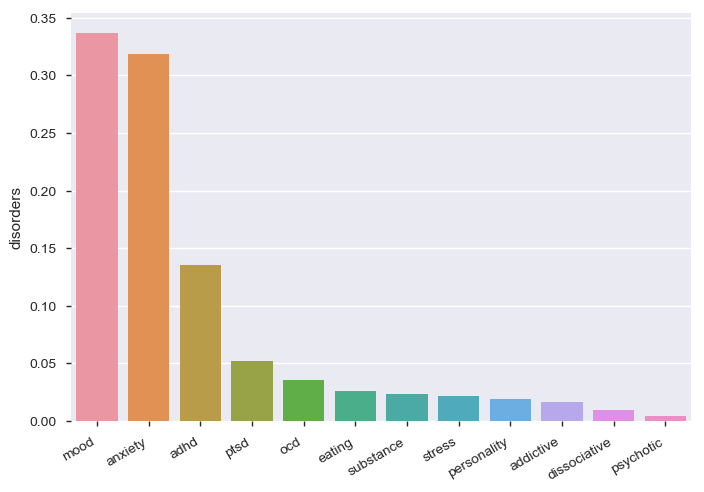

In [ ]:
d1= {'disorders': combined_list}
df = pd.DataFrame(data=d1)

fig = plt.figure(figsize=(8,6))
sns.barplot(x=df.disorders.value_counts(normalize=True).index, y=df.disorders.value_counts(normalize=True))
fig.autofmt_xdate()

### What affects an employers willingness to speak to a supervisor the most?

All of the independent variables listed below are implemented by the employer: 

1. Willingness to speak to a supervisor vs. benefits offered by employer
2. Willingness to speak to a supervisor vs. employer providing resources to learn how to seek help
3. Willingess to speak to a supervisor vs. employee wellness program
4. Willingness to speak to a supervisor vs. awareness of care options
5. Willingness to speak to a supervisor vs. the importance an employer places on mental health

#### 1. Do benefits offered affect an employers willingness to talk to a supervisor?

C:\Users\Kangaroo\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


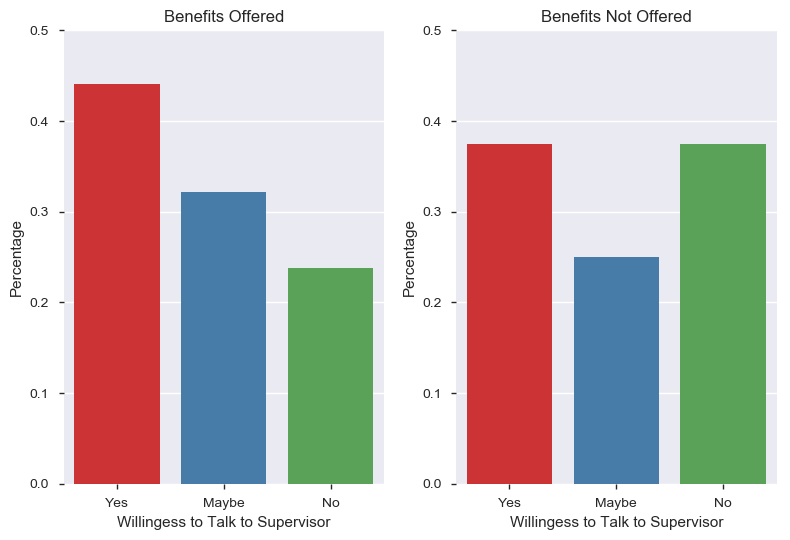

In [ ]:
df_2018_benefits_offered = df_2018[df_2018["benefits"] == "Yes"]
df_2018_benefits_offered;
df_2018_no_benefits_offered = df_2018[df_2018["benefits"] == "No"]
df_2018_no_benefits_offered;

fig, ax =plt.subplots(1,2);

sns.barplot(x=df_2018_benefits_offered.supervisor.value_counts(normalize = True).index, 
            y= df_2018_benefits_offered.supervisor.value_counts(normalize=True), 
            palette = sns.color_palette("Set1"), order = ["Yes","Maybe","No"],ax=ax[0])

sns.barplot(x=df_2018_no_benefits_offered.supervisor.value_counts(normalize=True).index, 
            y= df_2018_no_benefits_offered.supervisor.value_counts(normalize=True),
            palette = sns.color_palette("Set1"),order = ["Yes","Maybe","No"], ax=ax[1])

ax[0].set_xlabel('Willingess to Talk to Supervisor')
ax[0].set_ylabel('Percentage')
ax[0].set_ylim([0, 0.8])
ax[0].set_ylim([0, 0.5])
ax[1].set_xlabel('Willingess to Talk to Supervisor')
ax[1].set_ylabel('Percentage')
ax[1].set_ylim([0, 0.8])
ax[0].set_title("Benefits Offered")
ax[1].set_title("Benefits Not Offered")
ax[1].set_ylim([0, 0.5])
               
fig.tight_layout()
fig.show()

The first 2018 data bar chart, "Benefits Offered by Employer (i.e., 'Yes') vs. Comfort in Speaking to a Supervisor," above shows that when benefits are offered by the employer and the employees are made aware of it, there is a higher frequency of employees reporting a level of comfort in confiding in their respective supervisors regarding their situations. However, the second 2018 data bar chart, ""No Benefits Offered by Employer (i.e., 'No') vs. Comfort in Speaking to a Supervisor," shows that when benefits are not offered by the employer, employees are equally (in this case) split between feeling comfortable and uncomfortable in confiding in their respective supervisors regarding their situations, with a minority of employees being "on the fence" (i.e., 'Maybe') regarding their comfort levels in confiding in their supervisors regarding their respective situations. 

#### 2. Does an employer providing resources on how to seek help for mental health affect the willingness of an employee to speak to a supervisor regarding mental health?

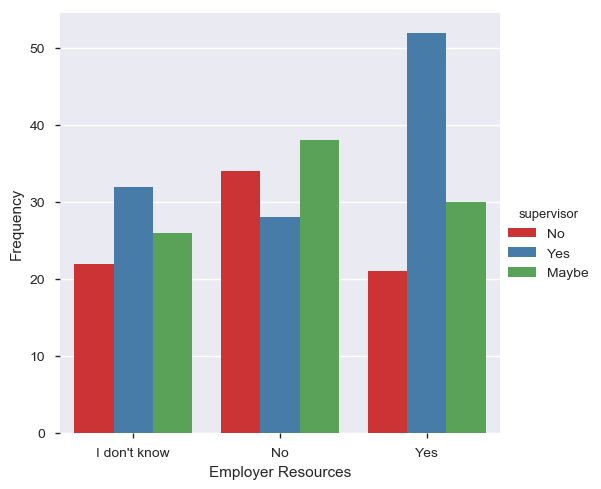

In [ ]:
sns.catplot(x = "seek_help", kind="count",hue="supervisor",
           palette = sns.color_palette("Set1"), data = df_2018)
plt.ylabel('Frequency');
plt.xlabel('Employer Resources');

Employees are far more likely to be willing to speak to their supervisors about mental health when employers offer resources to employees on learning to seek help

#### 3. Willingess to speak to a supervisor vs. employee wellness program

C:\Users\Kangaroo\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


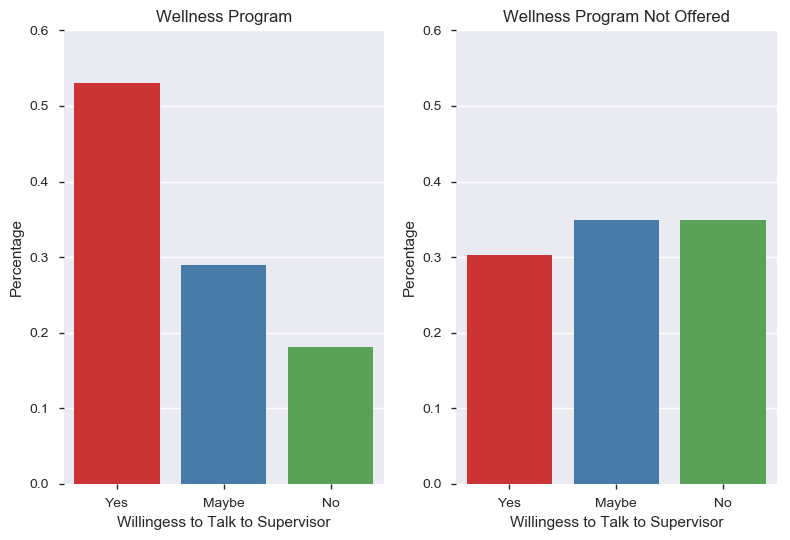

In [ ]:
df_2018_wellness_program = df_2018[df_2018["wellness_program"] == "Yes"]
df_2018_wellness_program;
df_2018_no_wellness_program = df_2018[df_2018["wellness_program"] == "No"]
df_2018_no_wellness_program;

fig, ax =plt.subplots(1,2);

sns.barplot(x=df_2018_wellness_program.supervisor.value_counts(normalize = True).index, 
            y= df_2018_wellness_program.supervisor.value_counts(normalize=True), 
            order = ["Yes","Maybe","No"], palette = sns.color_palette("Set1"), ax=ax[0])

sns.barplot(x=df_2018_no_wellness_program.supervisor.value_counts(normalize=True).index, 
            y= df_2018_no_wellness_program.supervisor.value_counts(normalize=True),
            order = ["Yes","Maybe","No"], palette = sns.color_palette("Set1"), ax=ax[1])

ax[0].set_xlabel('Willingess to Talk to Supervisor')
ax[0].set_ylabel('Percentage')
ax[0].set_ylim([0, 0.8])
ax[0].set_ylim([0, 0.6])
ax[1].set_xlabel('Willingess to Talk to Supervisor')
ax[1].set_ylabel('Percentage')
ax[1].set_ylim([0, 0.8])
ax[0].set_title("Wellness Program")
ax[1].set_title("Wellness Program Not Offered")
ax[1].set_ylim([0, 0.6])
               
fig.tight_layout()
fig.show()

Employees are significantly more willing to talk to supervisors about mental health when there is a wellness program offered. 

#### 4. Does the awareness of care options affect the willingness to speak to a supervisor about mental health?

C:\Users\Kangaroo\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


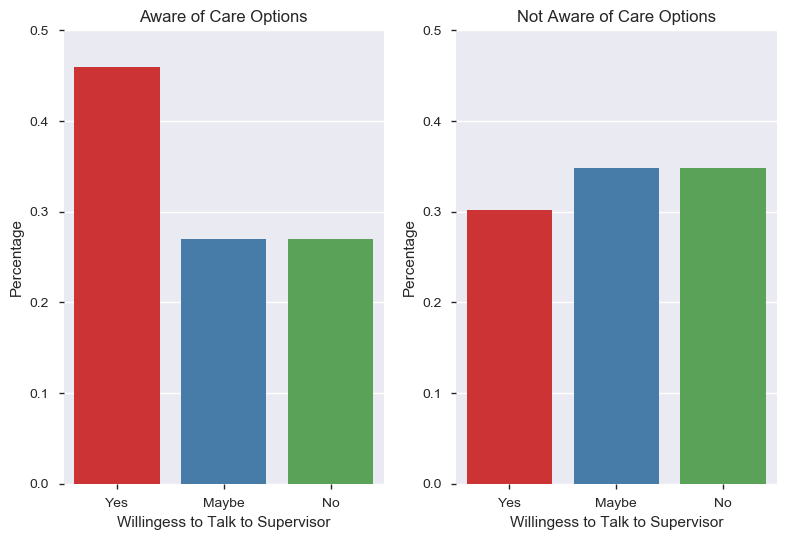

In [ ]:
df_2018_care_options = df_2018[df_2018["care_options"] == "Yes"]
df_2018_care_options;
df_2018_no_care_options = df_2018[df_2018["wellness_program"] == "No"]
df_2018_no_care_options;

fig, ax =plt.subplots(1,2);

sns.barplot(x=df_2018_care_options.supervisor.value_counts(normalize = True).index, 
            y= df_2018_care_options.supervisor.value_counts(normalize=True), 
            order = ["Yes","Maybe","No"], palette = sns.color_palette("Set1"), ax=ax[0])

sns.barplot(x=df_2018_no_care_options.supervisor.value_counts(normalize=True).index, 
            y= df_2018_no_care_options.supervisor.value_counts(normalize=True),
            order = ["Yes","Maybe","No"], palette = sns.color_palette("Set1"), ax=ax[1])

ax[0].set_xlabel('Willingess to Talk to Supervisor')
ax[0].set_ylabel('Percentage')
ax[0].set_ylim([0, 0.8])
ax[0].set_ylim([0, 0.5])
ax[1].set_xlabel('Willingess to Talk to Supervisor')
ax[1].set_ylabel('Percentage')
ax[1].set_ylim([0, 0.8])
ax[0].set_title("Aware of Care Options")
ax[1].set_title("Not Aware of Care Options")
ax[1].set_ylim([0, 0.5])
               
fig.tight_layout()
fig.show()

Employees are significantly more willing to talk to their supervisor about mental health when they are aware of care options. 

#### 5. Does the presumed importance an employer places on mental health affect the willingness to speak to a supervisor?

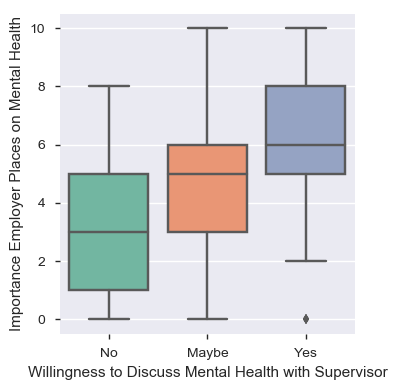

In [ ]:
fig = plt.figure(figsize=(4,4))
sns.boxplot(x="supervisor", y="importance_mental_health", data=df_2018,
            palette = sns.color_palette("Set2"),order = ["No", "Maybe", "Yes"]);
plt.ylabel('Importance Employer Places on Mental Health');
plt.xlabel('Willingness to Discuss Mental Health with Supervisor');
fig.tight_layout()

There is convincing data that the more an employee believes an employer places importance on mental health, the more likely they will speak to a supervisor. We will conduct an OLS Regression to test for significance.

#### Conclusion for factors affecting employees willingness to speak to supervisor about mental health
From these visualizations, we see the greatest differences in employee's willingness to talk to supervisors was made by employers providing resources on how to seek help for mental health and wellness programs being offered, where in both cases the willingness to speak to employers increased by over 20 percent, however, we see a 30 percent increase when employers put a greater emphasis into the importance of mental health. 

## Visualizing the Progress from 2014 to 2018

### Are there more employers offering benefits in 2018 from 2014?

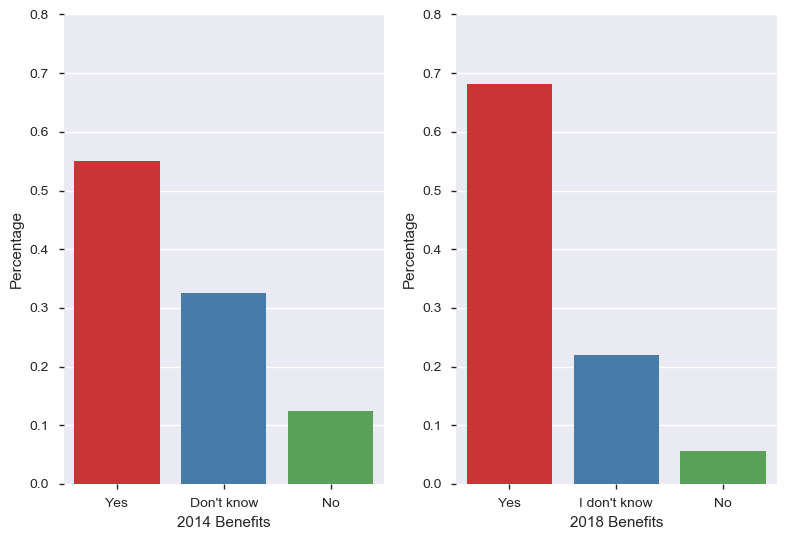

In [ ]:
fig, ax =plt.subplots(1,2);

sns.barplot(x=df_2014.benefits.value_counts(normalize=True).index, y=df_2014.benefits.value_counts(normalize=True), 
            order=["Yes","Don't know","No"], ax=ax[0], palette = sns.color_palette("Set1"))

sns.barplot(x=df_2018.benefits.value_counts(normalize=True).index, order=["Yes","I don't know","No"],
            y=df_2018.benefits.value_counts(normalize=True), palette = sns.color_palette("Set1"), ax=ax[1])

ax[0].set_xlabel('2014 Benefits')
ax[0].set_ylabel('Percentage')
ax[0].set_ylim([0, 0.8])
ax[1].set_xlabel('2018 Benefits')
ax[1].set_ylabel('Percentage')
ax[1].set_ylim([0, 0.8])

fig.tight_layout()


#### Takeaways
- The percentage of benefits offered has increased by 13.09%. 
- The percentage of those who said their employer does not offer benefits has decreased by 6.72%
- The percentage of those that don't know if they have benefits have decreased by 10.61%
- **Overall:** The amount of employer offering benefits have increased.

### Are employees more likely to feel comfortable speaking to a supervisor about mental health concerns?

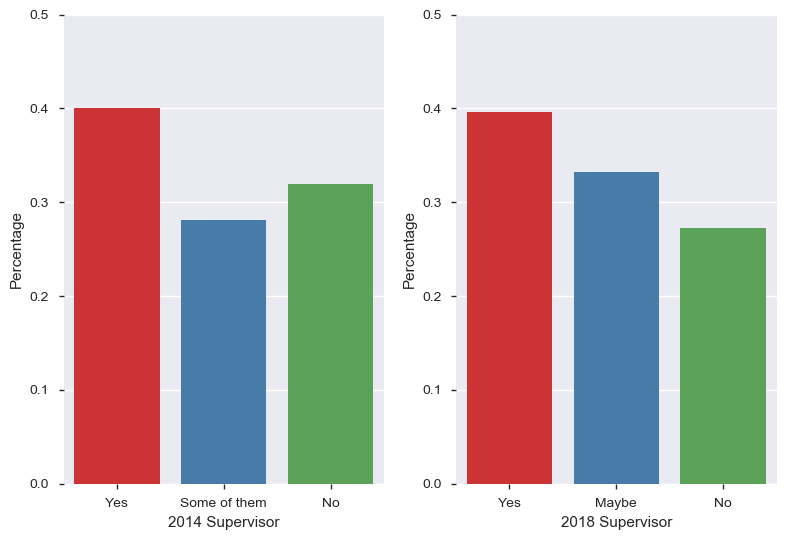

In [ ]:
fig, ax =plt.subplots(1,2);

sns.barplot(x=df_2014.supervisor.value_counts(normalize=True).index, y=df_2014.supervisor.value_counts(normalize=True), 
             palette = sns.color_palette("Set1"), order = ["Yes", "Some of them","No"],ax=ax[0])

sns.barplot(x=df_2018.supervisor.value_counts(normalize=True).index, 
            palette = sns.color_palette("Set1"), y=df_2018.supervisor.value_counts(normalize=True), ax=ax[1])

ax[0].set_xlabel('2014 Supervisor')
ax[0].set_ylabel('Percentage')
ax[0].set_ylim([0, 0.5])
ax[1].set_xlabel('2018 Supervisor')
ax[1].set_ylabel('Percentage')
ax[1].set_ylim([0, 0.5])

fig.tight_layout()

#### Takeaways
- The percentage of employees that would feel comfortable speaking to their supervisor has remained relatively stable, however, the percentage of those that would not feel comfortable has decreased by almost 5 percent. 

### Visualizing Observed Bad Response vs. Observed Good Response

In [ ]:
# Standardize the values
def clean_observed_response(observation):
    if observation == "Yes, I observed":
        observation = "Yes"
    if observation == "Yes, I experienced":
        observation = "Yes"
    if observation == "Maybe/Not sure":
        observation = "Not Sure"
    return observation

df_2018["observed_bad_response"] = df_2018["observed_bad_response"].apply(clean_observed_response)
df_2018["observed_good_response"]= df_2018["observed_good_response"].apply(clean_observed_response)

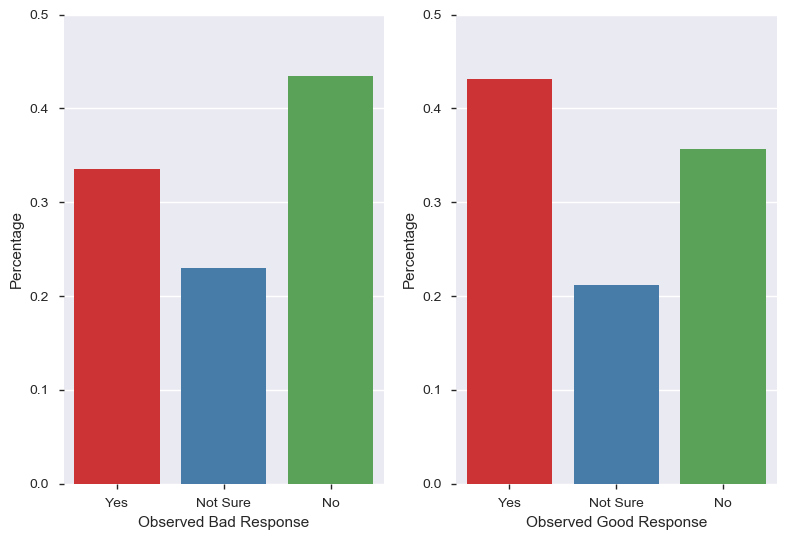

In [ ]:
fig, ax =plt.subplots(1,2);

sns.barplot(x=df_2018.observed_bad_response.value_counts(normalize=True).index, y=df_2018.observed_bad_response.value_counts(normalize=True), 
             ax=ax[0], order = ["Yes","Not Sure", "No"], palette = sns.color_palette("Set1"))

sns.barplot(x=df_2018.observed_good_response.value_counts(normalize=True).index,
            y=df_2018.observed_good_response.value_counts(normalize=True), order = ["Yes","Not Sure", "No"],
            palette = sns.color_palette("Set1"), ax=ax[1])

ax[0].set_xlabel('Observed Bad Response')
ax[0].set_ylabel('Percentage')
ax[0].set_ylim([0, 0.5])
ax[1].set_xlabel('Observed Good Response')
ax[1].set_ylabel('Percentage')
ax[1].set_ylim([0, 0.5])

fig.tight_layout()

### Mental Health Vs. Physical Health

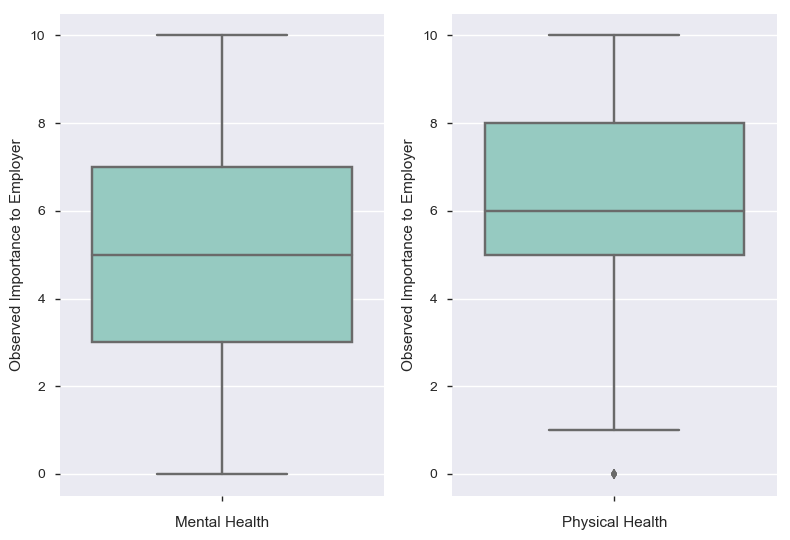

In [ ]:
fig, ax =plt.subplots(1,2);


sns.boxplot(y="importance_mental_health", data=df_2018, ax=ax[0],
            palette = sns.color_palette("Set3"));
           
sns.boxplot(y="importance_physical_health", data=df_2018, ax=ax[1],
            palette = sns.color_palette("Set3"));

ax[0].set_xlabel('Mental Health')
ax[0].set_ylabel('Observed Importance to Employer')

ax[1].set_xlabel('Physical Health')
ax[1].set_ylabel('Observed Importance to Employer')


fig.tight_layout()

Overall, the perceived importance placed on physical health supercedes importance placed on mental health by the employer. This may serve as an explanation as to why the percentage of employees that are comfortable to speak to their employer has not improved, despite more benefits being provided.

## Additional Visualizations

### Are there certain disorders that make an employee more/less comfortable speaking to a supervisor about?

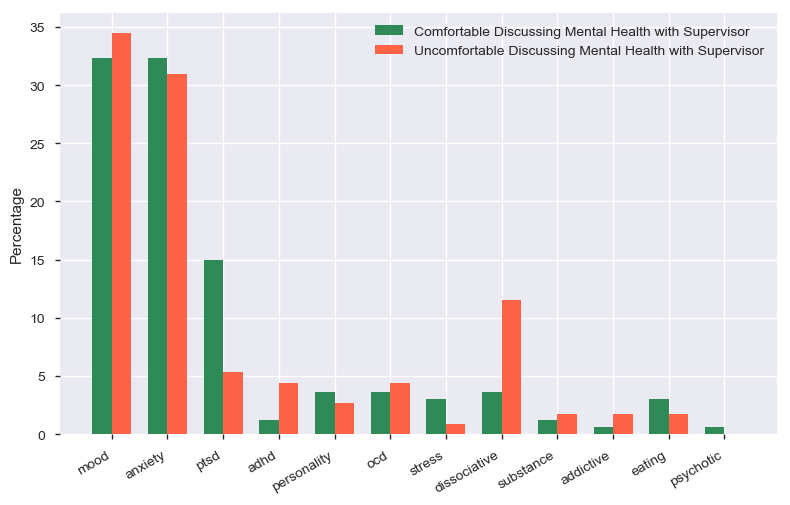

In [ ]:
n_groups = 12

yesMeans = tuple(yes_supervisor_percentage)
noMeans = tuple(no_supervisor_percentage)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 1
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, yesMeans, bar_width,
                alpha=opacity, color='seagreen'
                , error_kw=error_config,
                label='Comfortable Discussing Mental Health with Supervisor')

rects2 = ax.bar(index + bar_width, noMeans, bar_width,
                alpha=opacity, color='tomato',
                error_kw=error_config,
                label='Uncomfortable Discussing Mental Health with Supervisor')

ax.set_ylabel('Percentage')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['mood','anxiety','ptsd','adhd','personality','ocd',
                     'stress','dissociative','substance','addictive','eating','psychotic'])
ax.legend()

fig.tight_layout()
fig.autofmt_xdate()
plt.show()

It seems dissociative disorder in particular is most prevalently uncomfortable discussing mental health with their supervisor.


### Analyzing the column addressing "If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so." using WordCloud to filter most common words.

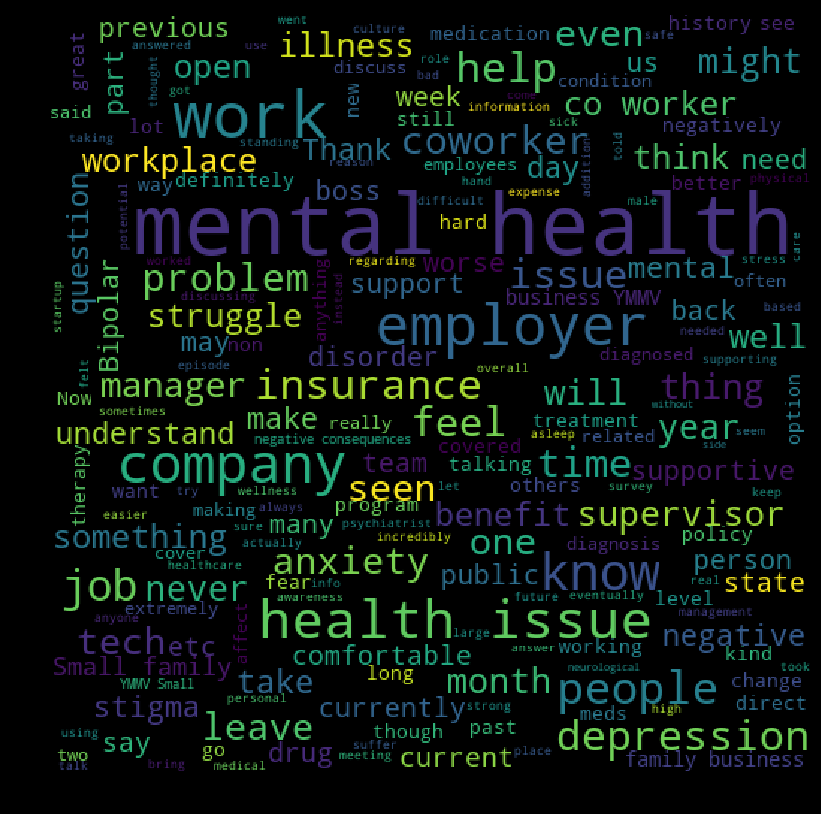

In [ ]:
#Wordcloud generate automatically removes stop words and processes most common words 2014 comments
wordcloud = wc(width = 512,height = 512).generate(comments)
plt.figure(figsize = (8, 8), facecolor = 'k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Overall, it seems words like "small family", "struggle", "fear", "stigma", "medication", and "startup" are potential confounding variables that may not have been considered in this 2014 study, and may be something to include in the next round of surveys. 

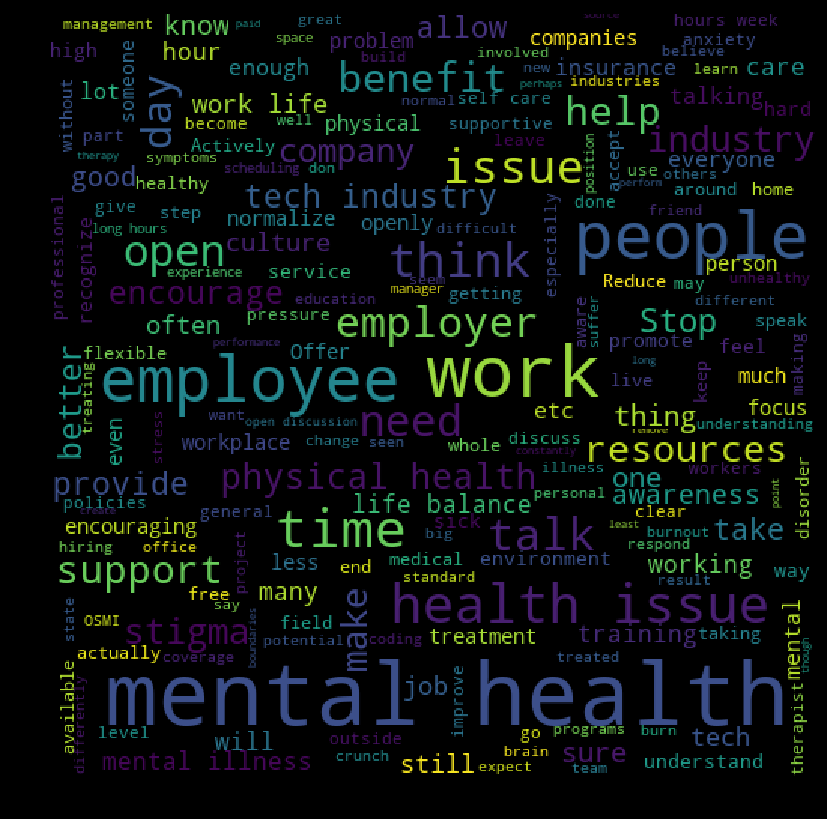

In [ ]:
#Wordcloud generate automatically removes stop words and processes most common words 2018
comments = df_2018['description'].str.cat(sep=', ') #add all comments into one string
wordcloud = wc(width = 512,height = 512).generate(comments)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Overall, it seems words like "therapist", "encouraging", "work life", "schedule", "policies", and "training" are potential confounding variables that may not have been considered in this 2018 study, and may be something to include in the next round of surveys. 

## Data Analysis and Results
For tests below, an alpha significance value of 0.05 was used.

In [ ]:
[outcome1_2018, predictors1_2018] = patsy.dmatrices('importance_physical_health ~ supervisor', df_2018)
mod_1_2018 = sm.OLS(outcome1_2018, predictors1_2018)
res_1_2018 = mod_1_2018.fit()
print(res_1_2018.summary())

                                OLS Regression Results                                
Dep. Variable:     importance_physical_health   R-squared:                       0.050
Model:                                    OLS   Adj. R-squared:                  0.043
Method:                         Least Squares   F-statistic:                     7.309
Date:                        Tue, 14 Apr 2020   Prob (F-statistic):           0.000805
Time:                                18:19:42   Log-Likelihood:                -641.49
No. Observations:                         283   AIC:                             1289.
Df Residuals:                             280   BIC:                             1300.
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

Given that the p-value, i.e., 0.003, is less than 0.05, and the coefficicent is 0.9850, for the relationship between the "Yes" responses for the "supervisor" column and the ratings for the importance_physical_health column in the "df_2018" dataframe, there could be a potentially strong, positive correlation between willingness to discuss mental health with a supervisor and the importance placed on physical health by the employer. Thus, the more likely an employee was to discuss their mental health situation with their supervisor, the higher the likelihood of the employer placing importance on physical health in the workplace. The same cannot be said, however, for the relationship between the "No" responses for the "supervisor" column and the ratings for the importance_physical_health column, given that the p-value is 0.566 for this relationship, which is not statistically significant. 

In [ ]:
[outcome2_2018, predictors2_2018] = patsy.dmatrices('importance_mental_health ~ supervisor', df_2018)
mod_2_2018 = sm.OLS(outcome2_2018, predictors2_2018)
res_2_2018 = mod_2_2018.fit()
print(res_2_2018.summary())

                               OLS Regression Results                               
Dep. Variable:     importance_mental_health   R-squared:                       0.198
Model:                                  OLS   Adj. R-squared:                  0.192
Method:                       Least Squares   F-statistic:                     34.56
Date:                      Tue, 14 Apr 2020   Prob (F-statistic):           3.86e-14
Time:                              18:19:42   Log-Likelihood:                -632.37
No. Observations:                       283   AIC:                             1271.
Df Residuals:                           280   BIC:                             1282.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

Given that the p-value, i.e., 0.001, is less than 0.05, and the coefficient is -1.1387, for the relationship between the "No" responses for the "supervisor" column and the ratings for the "importance_mental_health" column in the "df_2018" dataframe, there could be a potentially strong, negative correlation between willingness to discuss mental health with a supervisor and the importance placed on mental health by the employer. Thus, the less likely an employee was to discuss their mental health situation with their supervisor, the lesser the likelihood of the employer placing importance on mental health in the workplace. In a similar vein, since the p-value, i.e., 0.000, is less than 0.05, and the coefficient is 1.5999, for the relationship between the "Yes" responses for the "supervisor" column and the ratings for the "importance_mental_health" column, the more likely an employee was to discuss their mental health situation with their supervisor, the higher the likelihood of the employer placing importance on mental health in the workplace. 

In [ ]:
[outcome3_2018, predictors3_2018] = patsy.dmatrices('importance_physical_health ~ supervisor + coworkers', df_2018)
mod_3_2018 = sm.OLS(outcome3_2018, predictors3_2018)
res_3_2018 = mod_3_2018.fit()
print(res_3_2018.summary())

                                OLS Regression Results                                
Dep. Variable:     importance_physical_health   R-squared:                       0.063
Model:                                    OLS   Adj. R-squared:                  0.050
Method:                         Least Squares   F-statistic:                     4.684
Date:                        Tue, 14 Apr 2020   Prob (F-statistic):            0.00113
Time:                                18:19:42   Log-Likelihood:                -639.46
No. Observations:                         283   AIC:                             1289.
Df Residuals:                             278   BIC:                             1307.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

With an additional predictor for the "importance_physical_health" column, "coworkers," our initial analyses regarding the respective relationships between the "No" responses in the "supervisor" column and the "Yes" responses in the "supervisor" column and the importance placed on physical health by the employer are not all valid anymore (given that all but one of the p-values in this case are not statistically significant). However, our initial analysis that the more likely an employee was to discuss their mental health situation with their supervisor, the higher the likelihood of the employer placing importance on physical health in the workplace still holds true. 

In [ ]:
[outcome4_2018, predictors4_2018] = patsy.dmatrices('importance_mental_health ~ supervisor + coworkers', df_2018)
mod_4_2018 = sm.OLS(outcome4_2018, predictors4_2018)
res_4_2018 = mod_4_2018.fit()
print(res_4_2018.summary())

                               OLS Regression Results                               
Dep. Variable:     importance_mental_health   R-squared:                       0.232
Model:                                  OLS   Adj. R-squared:                  0.221
Method:                       Least Squares   F-statistic:                     20.99
Date:                      Tue, 14 Apr 2020   Prob (F-statistic):           3.92e-15
Time:                              18:19:42   Log-Likelihood:                -626.25
No. Observations:                       283   AIC:                             1263.
Df Residuals:                           278   BIC:                             1281.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

With an additional predictor for the "importance_mental_health" column, "coworkers," our initial analyses regarding the respective relationships between the "No" responses in the "supervisor" column and the "Yes" responses in the "supervisor" column and the importance placed on mental health by the employer are all still valid. In fact, given that the p-value is 0.034, which is less than 0.05, and the coefficient is -0.7855 for the relationship between the "No" responses in the "coworkers" column and the importance placed on mental health by the employer, the less likely an employee is to discuss their mental health situation with their coworkers, the lesser the likelihood of the employer placing importance on mental health in the workplace. The same cannot be said, however, for the relationship between the "Yes" responses for the "coworkers" column and the ratings for the importance_mental_health column, given that the p-value is 0.054 for this relationship, which is not statistically significant. 


In [ ]:
[outcome5_2018, predictors5_2018] = patsy.dmatrices('overall_tech ~ benefits', df_2018)
mod_5_2018 = sm.OLS(outcome5_2018, predictors5_2018)
res_5_2018 = mod_5_2018.fit()
print(res_5_2018.summary())

                            OLS Regression Results                            
Dep. Variable:           overall_tech   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     9.080
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           9.37e-06
Time:                        18:19:42   Log-Likelihood:                -370.24
No. Observations:                 283   AIC:                             748.5
Df Residuals:                     279   BIC:                             763.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

Given that the p-value, i.e., 0.000, is less than 0.05, and the coefficicent is 0.5249, for the relationship between the "Yes" responses for the "benefits" column and the ratings for the "overall_tech" (overall, how well the employee thinks the tech industry supports employees (as a whole), on a scale of 1-10), we came to the conclusion that when the employer offered benefits to their employees, the higher the rating by the employee of how well the tech industry supports its employees as a whole. There are no specific relationships that can be drawn between the "No" and "Not eligible for coverage / NA" responses for the "benefits" column and the tech industry support ratings because the p-values for these relationships are not statistically significant. 

## Privacy/Ethics Considerations
The two surveys are licensed under a Creative Commons Attribution-ShareAlike 4.0 International. We have the ability to copy and redistribute the material in any medium or format as well as the ability to remix, transform and build upon it. However, one of the conditions are attribution, in which we must give credit to the source and indicate what changes were made. Another condition is that in the event that we transform the material, we must distribute our contributions under the Creative Commons Attribution-ShareAlike 4.0 International.

We initially sought out to analyze the relationship between various countries and attitudes towards mental health given that every country has varying degrees of stigma relating to mental health matters. However, we recognized that the data could be a problematic representation due to the fact that most respondents were from the US and the rest were scattered. For our current research question, the potentially problematic note in terms of allowing for equitable analysis is that within the 2018 tech survey, 85% of the respondents were white. Race may be a potential confounding variable, therefore we decided to drop that column. Furthermore, given that the dataset did not involve any web scraping, we did not need to employ most of the Safe Harbor methodology. However, we did remove Network IDs as we felt it may be a potential privacy concern. 


## Conclusions & Discussions

From our statistical analyses, we have promising results that reveal the significance of employers providing mental health benefits and its positive effect on employees regarding open communication of mental health in the workplace. 


Based on the 2018 data, we were able to deduce that the the higher the perceived importance an employer places on physical health and mental health in the workplace, the more likely an employee was to discuss their mental health situation with their supervisor (p-value = 0.003, 0.00 respectively). These proved to be statistically significant relationships with not just one predictor, but two predictors. These analyses could provide a basis for employers to not only organize more workshops and talks centered on the importance of mental health for their respective employees, but also, workshops on physical fitness and the mind-body connection. We were also able to deduce a statistically significant relationship between benefits offered by an employer for mental health and the overall impression of the tech industry in regard to its support of employers - we found that when benefits were offered to an employee, the higher the likelihood of them having a positive impression of the support system the tech industry provides for its employees (as a whole). 


#### Analysis from Visualizations

Additionally, from our bar charts for the 2018 data, a potentially positive relationship can be noted between the offering of mental health benefits by an employer and the likelihood of an employee to discuss their mental health situations with their supervisors. When the employer was noted to offer mental health benefits, the highest frequency was found for the "Yes" column of the "supervisor" column in the 2018 data, signifying a potential correlation - if the employer offers mental health benefits, the employee is more likely to confide in their supervisor regarding their mental health situation.


In terms of factors that contribute to the willingness of employees to openly discuss mental health with their supervisor, we observed that the most important factors included wellness programs and resources being offered by the employers. 


Based on our statistical analyses and data visualizations, it can be concluded that our hypothesis holds true to a certain degree based on our data - through the relationships we observed, we were able to note that when employees were made aware of the importance of physical and mental health, and the mental health benefits offered by their respective companies, they were more likely to have a positive impression of the tech industry and the wilingness to confide in their supervisors regarding their mental health situations.

#### Looking forward: the progression from 2014 to 2018
Overall, the perceived importance placed on physical health supercedes importance placed on mental health by the employer. This may serve as an explanation as to why the percentage of supervisors that are comfortable to speak to their employer has not improved, despite more benefits being provided.

## Considerations & Limitations
Potential problems with our data include the limitation of countries (as most of the data is domestic), thereby limiting international comparisons. Another potential problem was observed after skimming the raw data responses. Some responses were clearly irrelevant from the question and may have been completed by participants who did not take the survey seriously. To avoid this from affecting our data, we tried to drop these responses during the cleaning process. 

## References
1. "Why We Need to Talk About Burnout in the Tech Industry": 
https://www.forbes.com/sites/laurencebradford/2018/06/19/why-we-need-to-talk-about-burnout-in-the-tech-industry/#436738e61406

2. "Are Entrepreneurs 'Touched with Fire'?":
http://ww2.kqed.org/stateofhealth/wp-content/uploads/sites/27/2015/04/Are-Entrepreneurs-Touched-with-Fire.pdf

3. "Mental health & substance abuse coverage":
https://www.healthcare.gov/coverage/mental-health-substance-abuse-coverage/